In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.optimize import curve_fit
from scipy.integrate import solve_ivp

%matplotlib notebook

In [2]:
# total_tweets is I
# user_followers_count is S

# Read first 400 timestamps
df = pd.read_csv('data/timeseries/Verified/TRUMP_CHANTING_VERIFIED.csv')
df = df[:400]

yData = np.cumsum(df['total_tweets'])
xData = np.arange(0, len(df), 1)

# Time span for the solve_ivp function
tSpan = [0, len(df)]

# Initial infections at the start
I0 = yData[0]

------------ Parameters -------------
S0 = 26075.008631984656
E0 = 3697.663650416755
Z0 = 4960.285950068849
beta = 0.00010424525783735672
b = 0.061676862047482
ro = 0.17296291342110615
p = 0.032964728489218095
e = 0.02965275728725226
l = 0.024327454154160776


<IPython.core.display.Javascript object>


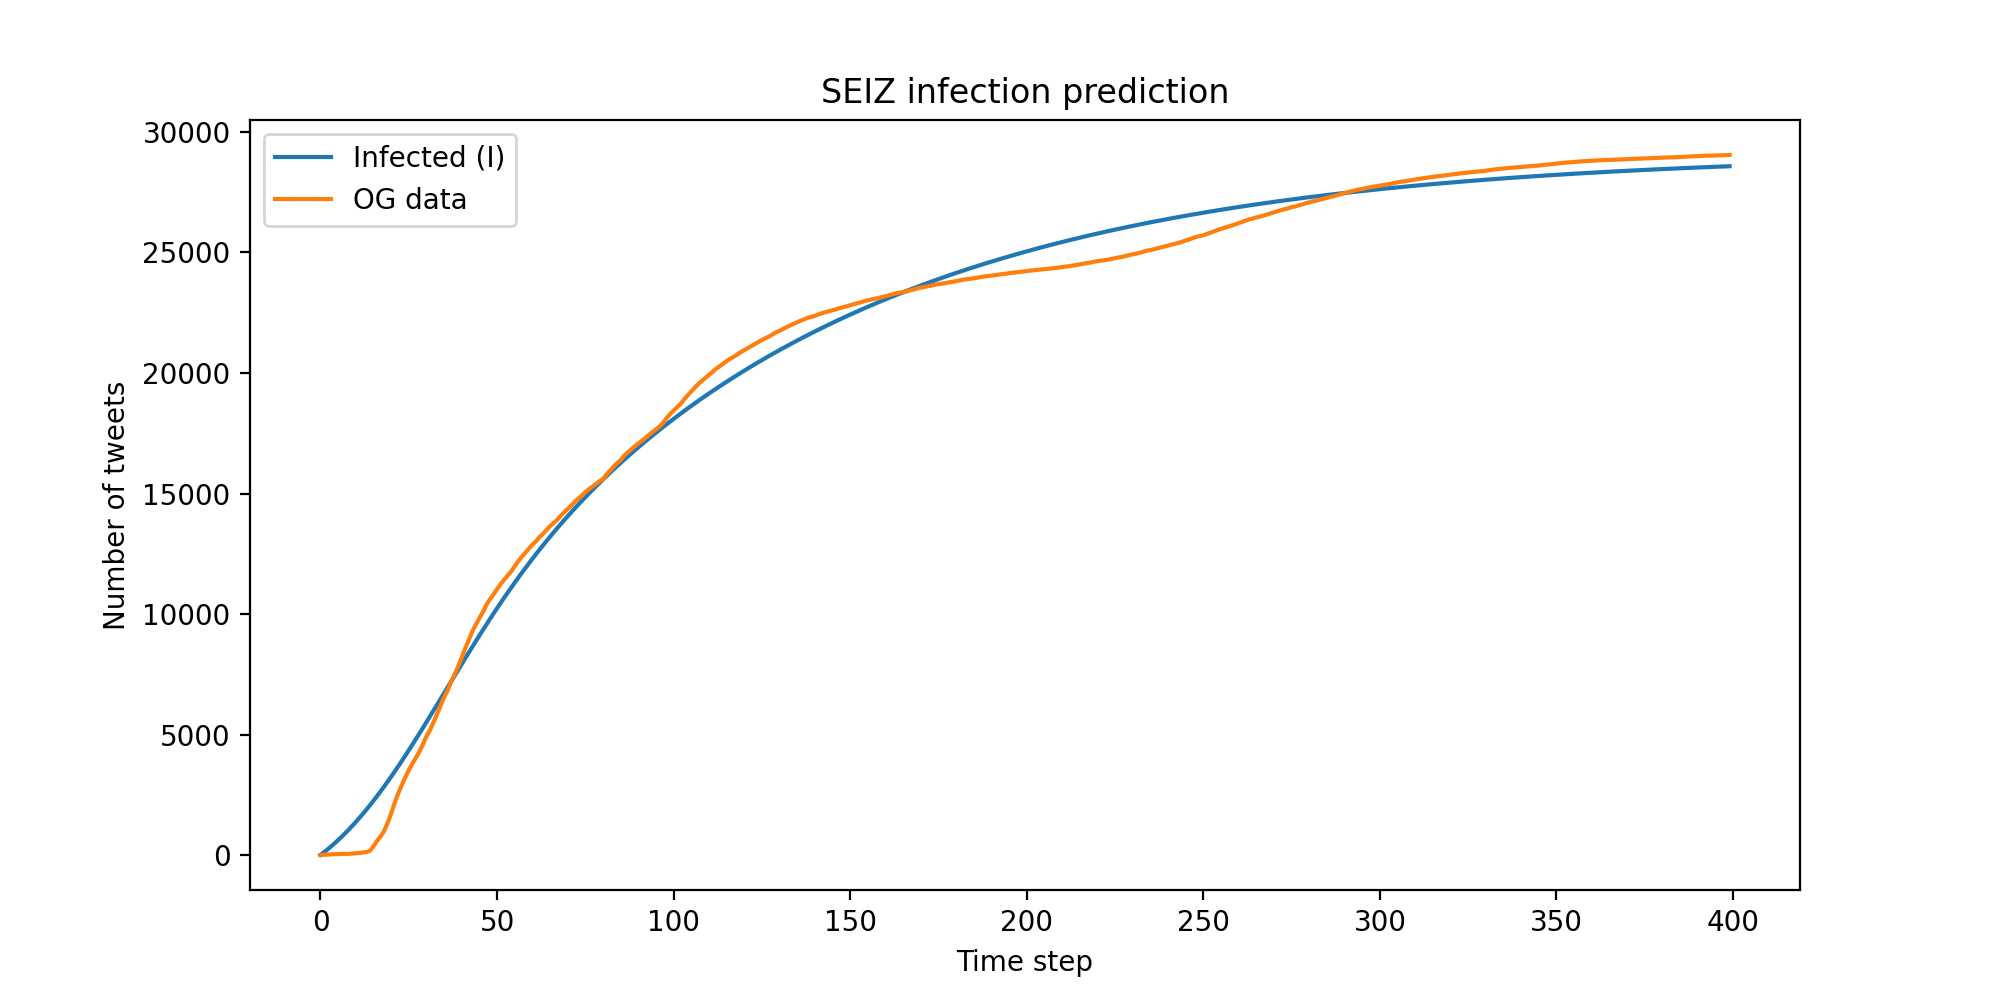

<IPython.core.display.Javascript object>


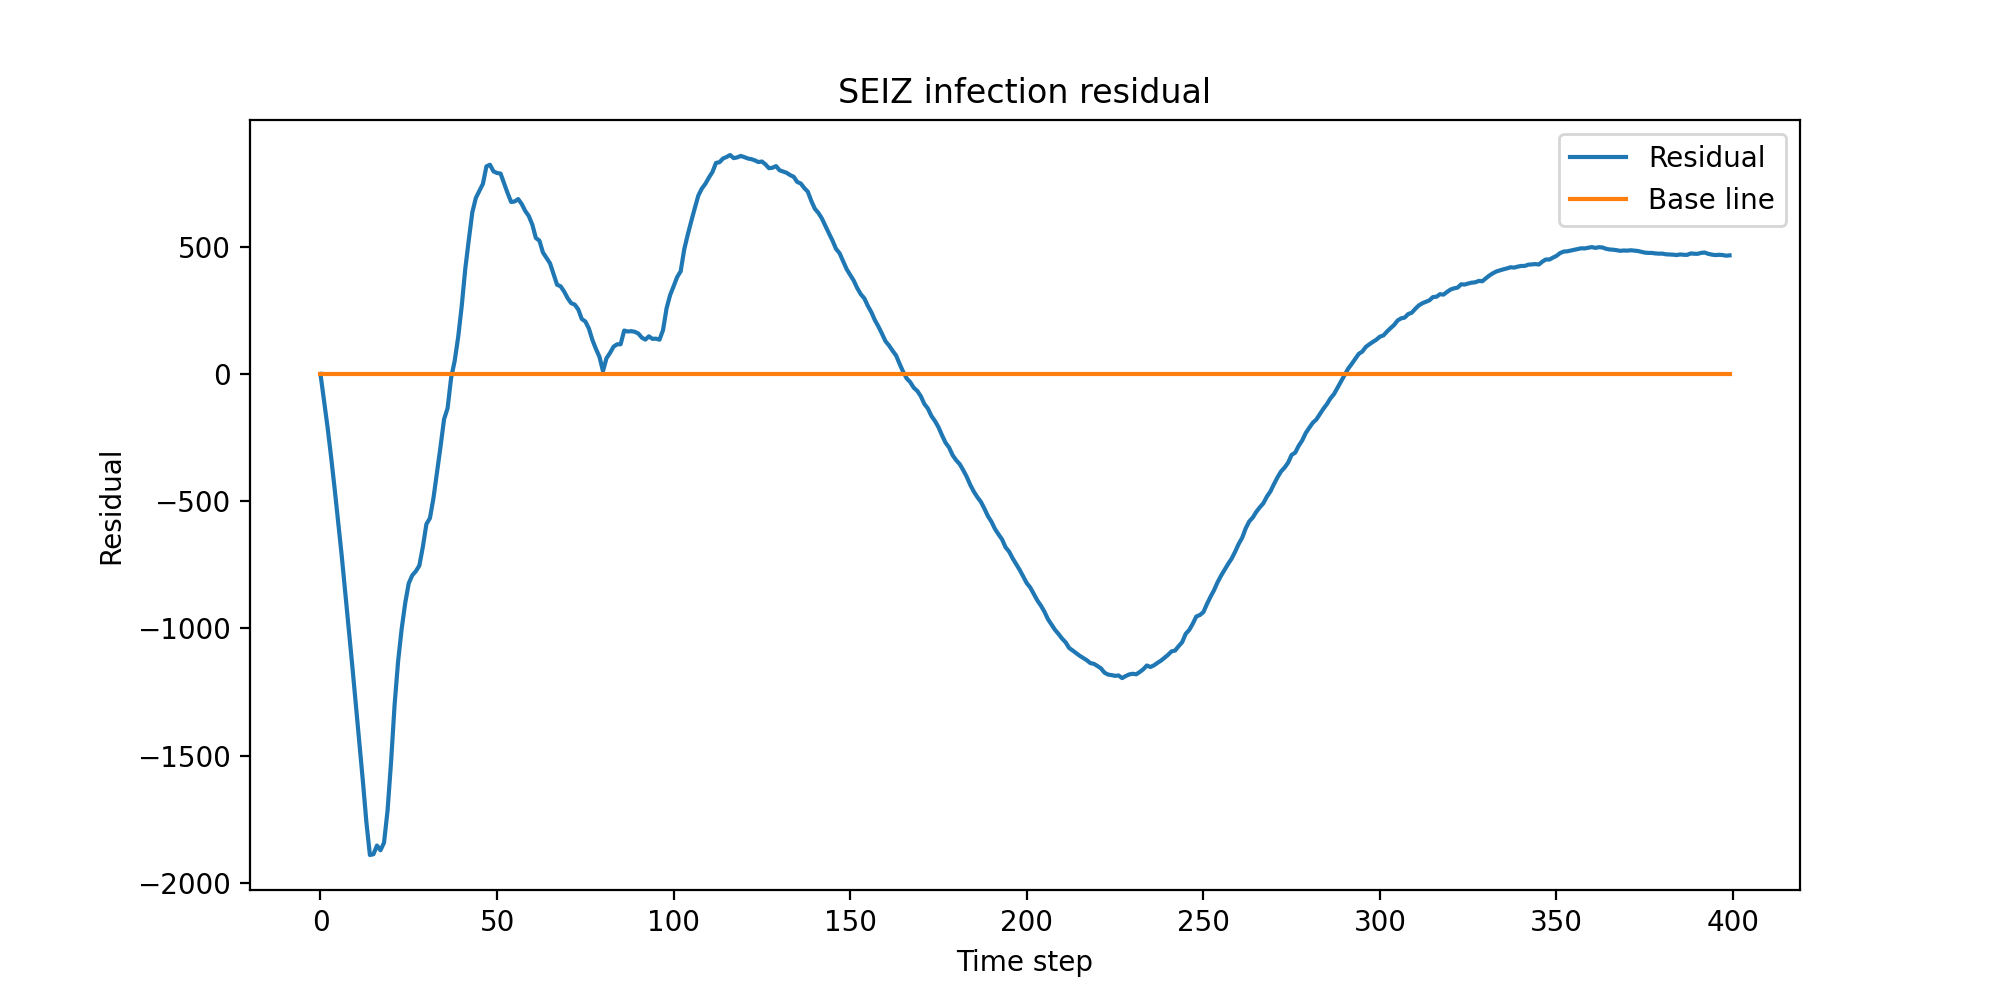

<IPython.core.display.Javascript object>


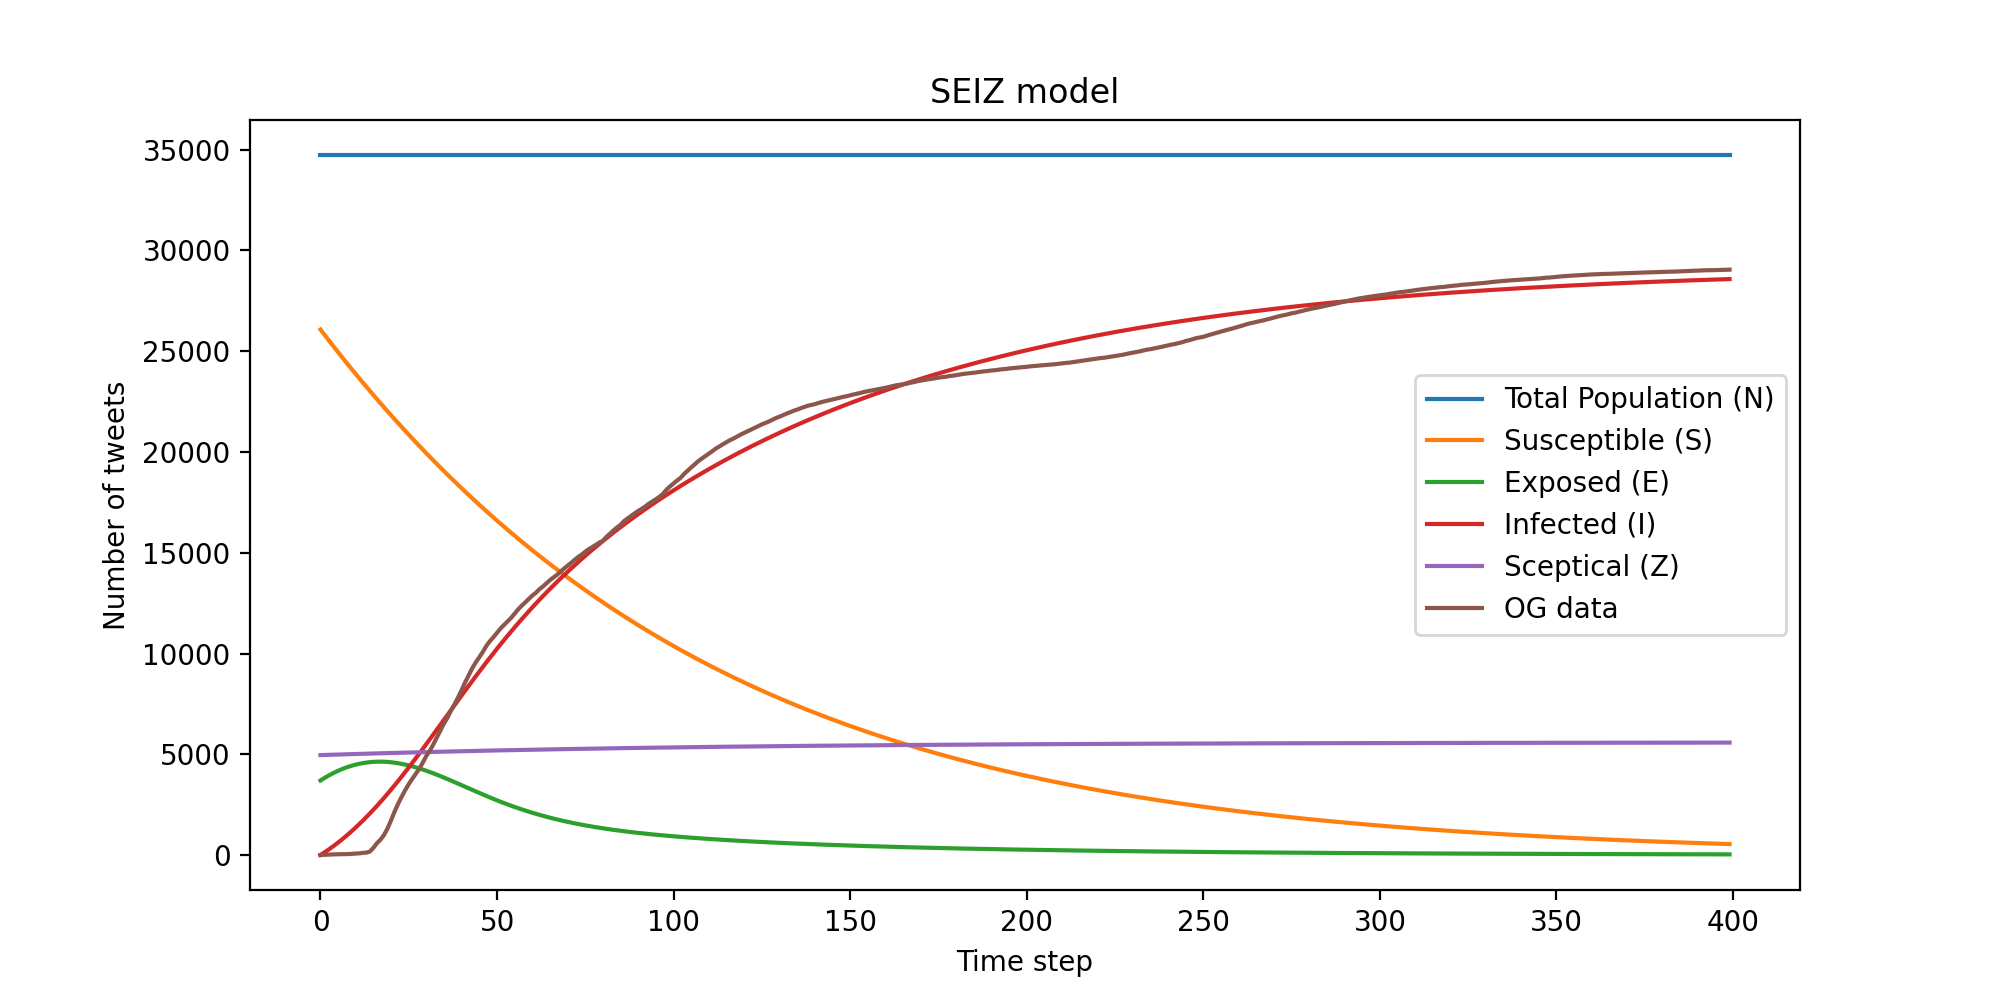

In [8]:
# Run this for the SEIZ model

# Function for SEIZ system of ODEs
# S0, E0, Z0, beta, b, ro, p, e and l are unknown
def seiz(t, y, S0, E0, Z0, beta, b, ro, p, e, l):
    S = y[0]
    E = y[1]
    I = y[2]
    Z = y[3]
    
    N = S0 + E0 + I0 + Z0
    
    dS = -1 * beta * S * (I / N) - b * S * (Z / N)
    dE = (1 - p) * beta * S * (I / N) + (1 - l) * b * S * (Z / N) - ro * E * (I / N) - e * E
    dI = p * beta * S * (I / N) + ro * E * (I / N) + e * E
    dZ = l * b * S * (Z / N)
    
    return [dS, dE, dI, dZ]

def solve_seiz(x, *args):
    initialValues = [args[0], args[1], I0, args[2]] # [S0, E0, I0, Z0]
    
    return solve_ivp(seiz, tSpan, initialValues, method='BDF', t_eval=x, args=args).y

def fit_seiz(x, *args):
    # Return the solution for the infections which we can then compare to the OG data
    return solve_seiz(x, *args)[2]

initial_guess = [100, 100, 100, 1e-20, 1e-20, 1e-20, 1e-20, 1e-20, 1e-20]
bounds = (0, [9e8, 9e8, 9e8, 1, 1, 1, 1, 1, 1]) # All changing parameters should theoretically be between [0, 1]

popt, pcov = curve_fit(fit_seiz, xData, yData, initial_guess, bounds=bounds)

print('------------ Parameters -------------')
print(f'S0 = {popt[0]}')
print(f'E0 = {popt[1]}')
print(f'Z0 = {popt[2]}')
print(f'beta = {popt[3]}')
print(f'b = {popt[4]}')
print(f'ro = {popt[5]}')
print(f'p = {popt[6]}')
print(f'e = {popt[7]}')
print(f'l = {popt[8]}')

# Fitted SEIZ model with the guessed args
fitted = solve_seiz(xData, *popt)

infected_residuals = yData - fitted[2]

# Plotting

# Prediction accuracy
plt.figure(figsize=(10, 5))
plt.title('SEIZ infection prediction')

plt.plot(fitted[2], label='Infected (I)')
plt.plot(yData, label='OG data')

plt.xlabel('Time step')
plt.ylabel('Number of tweets')

plt.legend()

plt.savefig('seiz_prediction.png')

plt.show()

# Infection residual
plt.figure(figsize=(10, 5))
plt.title('SEIZ infection residual')

plt.plot(infected_residuals, label='Residual')
plt.plot([0] * len(df), label='Base line')

plt.xlabel('Time step')
plt.ylabel('Residual')

plt.legend()

plt.savefig('seiz_residual.png')

plt.show()

# Whole SEIZ model
plt.figure(figsize=(10, 5))
plt.title('SEIZ model')

N = popt[0] + popt[1] + I0 + popt[2]

plt.plot([N] * len(df), label='Total Population (N)')
plt.plot(fitted[0], label='Susceptible (S)')
plt.plot(fitted[1], label='Exposed (E)')
plt.plot(fitted[2], label='Infected (I)')
plt.plot(fitted[3], label='Sceptical (Z)')

plt.plot(yData, label='OG data')

plt.xlabel('Time step')
plt.ylabel('Number of tweets')

plt.legend()

plt.savefig('seiz_model.png')

plt.show()

In [2]:
# SIR, SIZ and other models will be added later

In [2]:
df = pd.read_csv('data/timeseries/Verified/TRUMP_CHANTING_VERIFIED.csv')

In [3]:

df['follower_distribution'][0]

'[320, 15160]'

In [4]:
import ast
distribution = []

for line in df['follower_distribution']:
    array = ast.literal_eval(line)
    
    for item in array:
        distribution.append(item)

a = np.array(distribution)

<IPython.core.display.Javascript object>


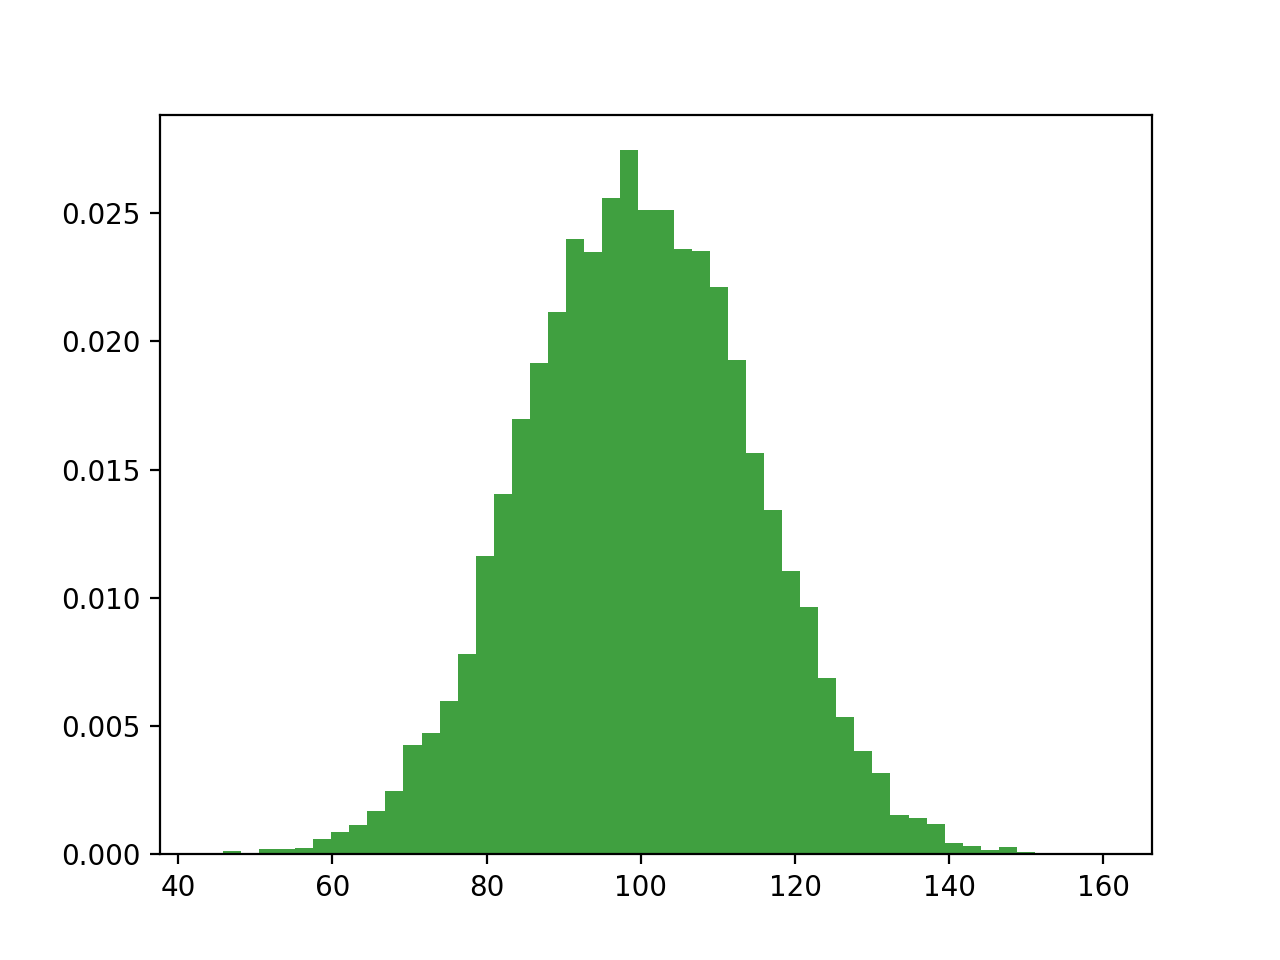

In [55]:


np.random.seed(19680801)

mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000)

# the histogram of the data
n, bins, patches = plt.hist(x, 50, density=True, facecolor='g', alpha=0.75)

In [52]:
a

array([  320, 15160,    10, ...,  2870,     0,   100])

<IPython.core.display.Javascript object>


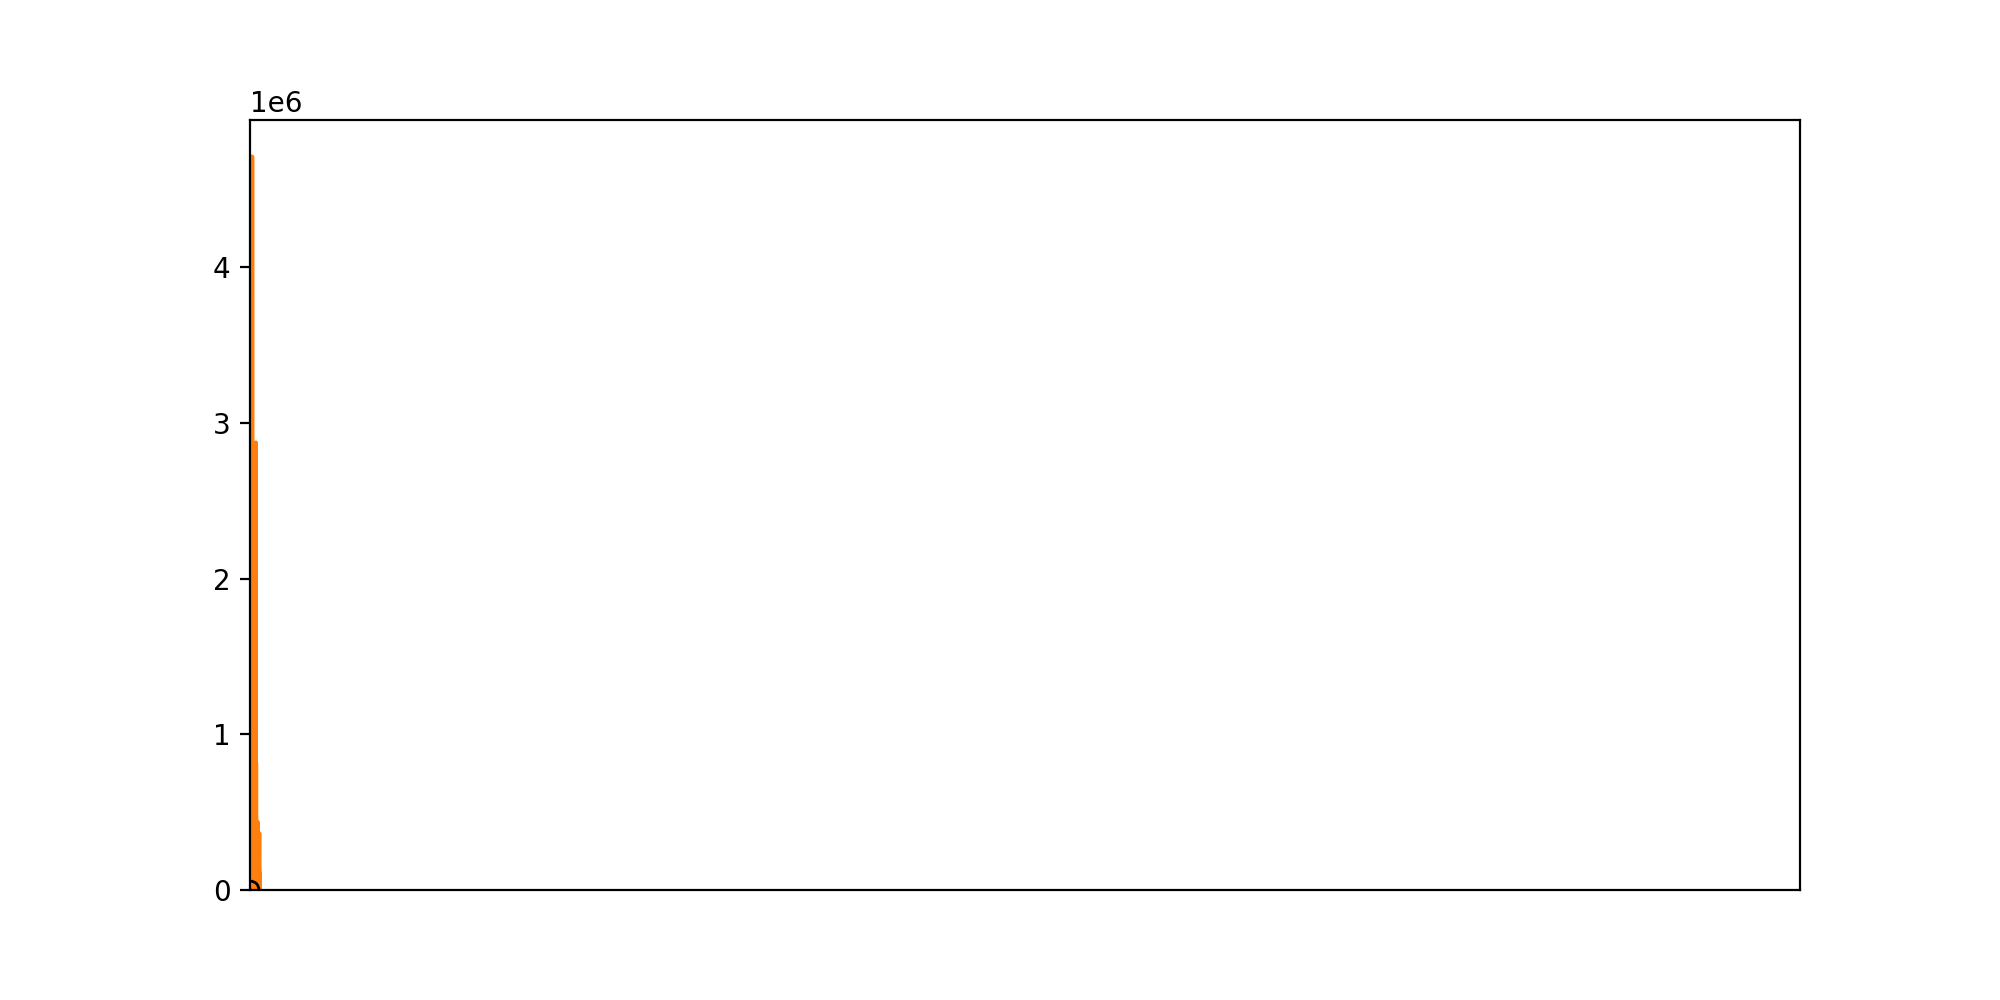

In [57]:

plt.figure(figsize=(10, 5))

plt.hist(a, 50, density=True, facecolor='g', alpha=0.75)

plt.show()

In [7]:
da = pd.Series(a)

<IPython.core.display.Javascript object>


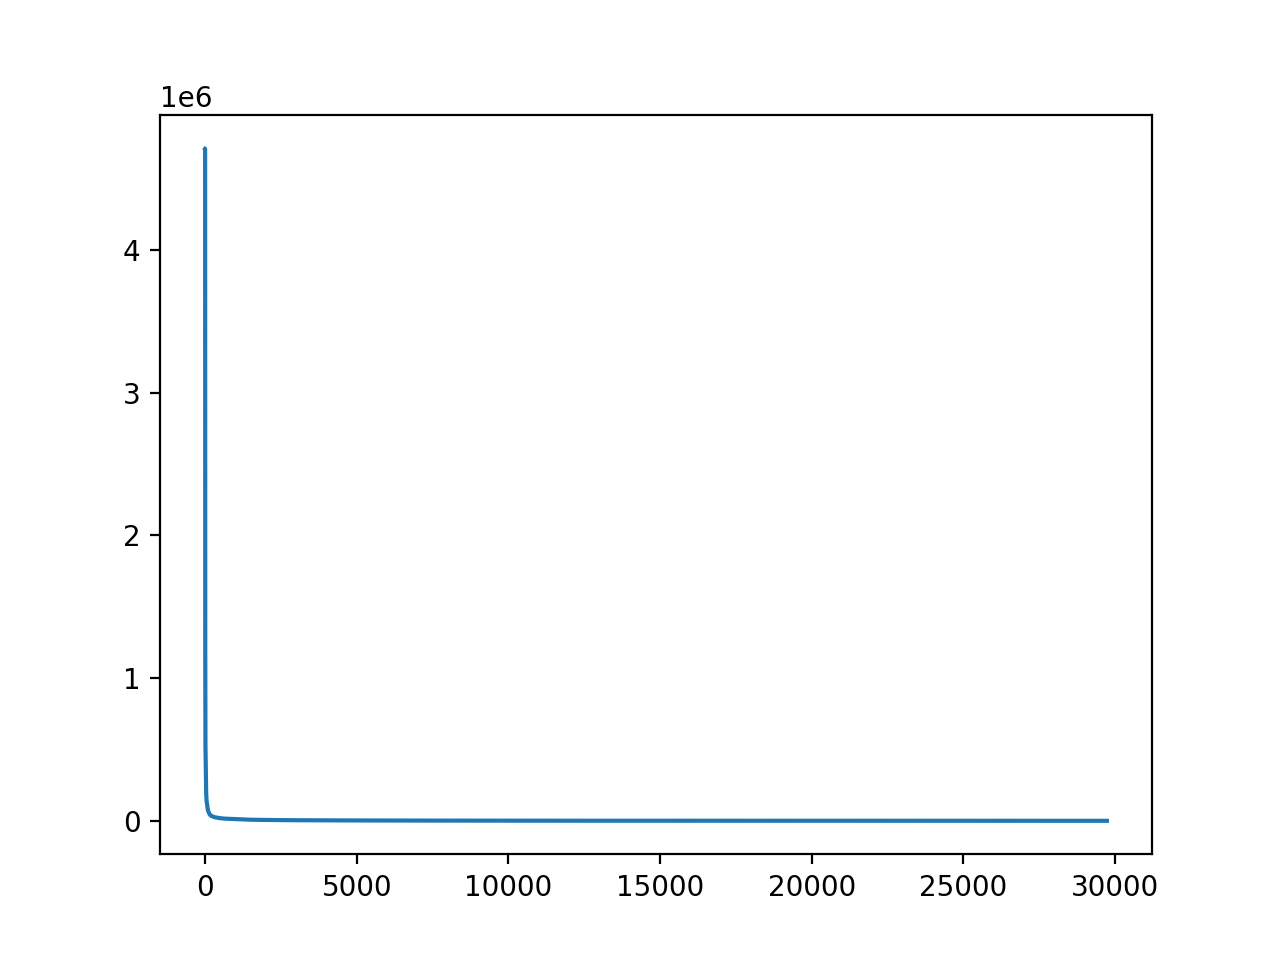

<AxesSubplot:>

In [16]:
da.sort_values(ascending = False, ignore_index = True).plot()

In [4]:
import networkx as nx

c = 10# 2.9e9

In [7]:
# sequence = nx.utils.powerlaw_sequence(100, 1.1)
# sequencee = [round(i) for i in sequence]

G = nx.directed_configuration_model(real_seq, real_seq)
G.remove_edges_from(nx.selfloop_edges(G))

In [52]:
for node in G:
    print(G[node])

{4: {0: {}, 1: {}, 2: {}, 3: {}, 4: {}, 5: {}, 6: {}, 7: {}, 8: {}, 9: {}, 10: {}, 11: {}, 12: {}, 13: {}, 14: {}, 15: {}, 16: {}, 17: {}, 18: {}, 19: {}, 20: {}, 21: {}, 22: {}, 23: {}, 24: {}, 25: {}, 26: {}, 27: {}, 28: {}, 29: {}, 30: {}, 31: {}, 32: {}, 33: {}, 34: {}, 35: {}, 36: {}, 37: {}, 38: {}, 39: {}, 40: {}, 41: {}, 42: {}, 43: {}, 44: {}, 45: {}, 46: {}, 47: {}, 48: {}, 49: {}, 50: {}, 51: {}, 52: {}, 53: {}, 54: {}, 55: {}, 56: {}, 57: {}, 58: {}, 59: {}, 60: {}, 61: {}, 62: {}, 63: {}, 64: {}, 65: {}}, 0: {0: {}, 1: {}, 2: {}, 3: {}, 4: {}, 5: {}, 6: {}, 7: {}, 8: {}, 9: {}, 10: {}, 11: {}, 12: {}, 13: {}, 14: {}, 15: {}, 16: {}}, 2: {0: {}, 1: {}, 2: {}, 3: {}}, 1: {0: {}}}
{4: {0: {}}}
{4: {0: {}, 1: {}, 2: {}, 3: {}, 4: {}, 5: {}, 6: {}, 7: {}, 8: {}, 9: {}, 10: {}}, 0: {0: {}, 1: {}, 2: {}, 3: {}}}
{4: {0: {}, 1: {}, 2: {}, 3: {}}}
{4: {0: {}, 1: {}, 2: {}, 3: {}, 4: {}, 5: {}, 6: {}, 7: {}, 8: {}, 9: {}, 10: {}, 11: {}, 12: {}, 13: {}, 14: {}, 15: {}, 16: {}, 17: {

In [5]:
seq = nx.utils.powerlaw_sequence(20, 2)
seq

[1.6451236943463017,
 37.260777688562214,
 2.0355092292554104,
 2.5550665790209552,
 1.06221495018479,
 1.2572193718440061,
 2.453902993131039,
 1.314932469715399,
 2.035710860649838,
 1.214721241990514,
 1.5615109608090287,
 7.0806264234591465,
 1.6484650800179834,
 2.3043748167139655,
 1.3053428380244552,
 5.281232390803612,
 4.970505847631239,
 1.1933111709436037,
 4.364027880287093,
 1.1977139511040327]

In [6]:
real_seq = [round(i) for i in seq]
np.array(real_seq).sum()

82

In [50]:
len(G)

5

<IPython.core.display.Javascript object>


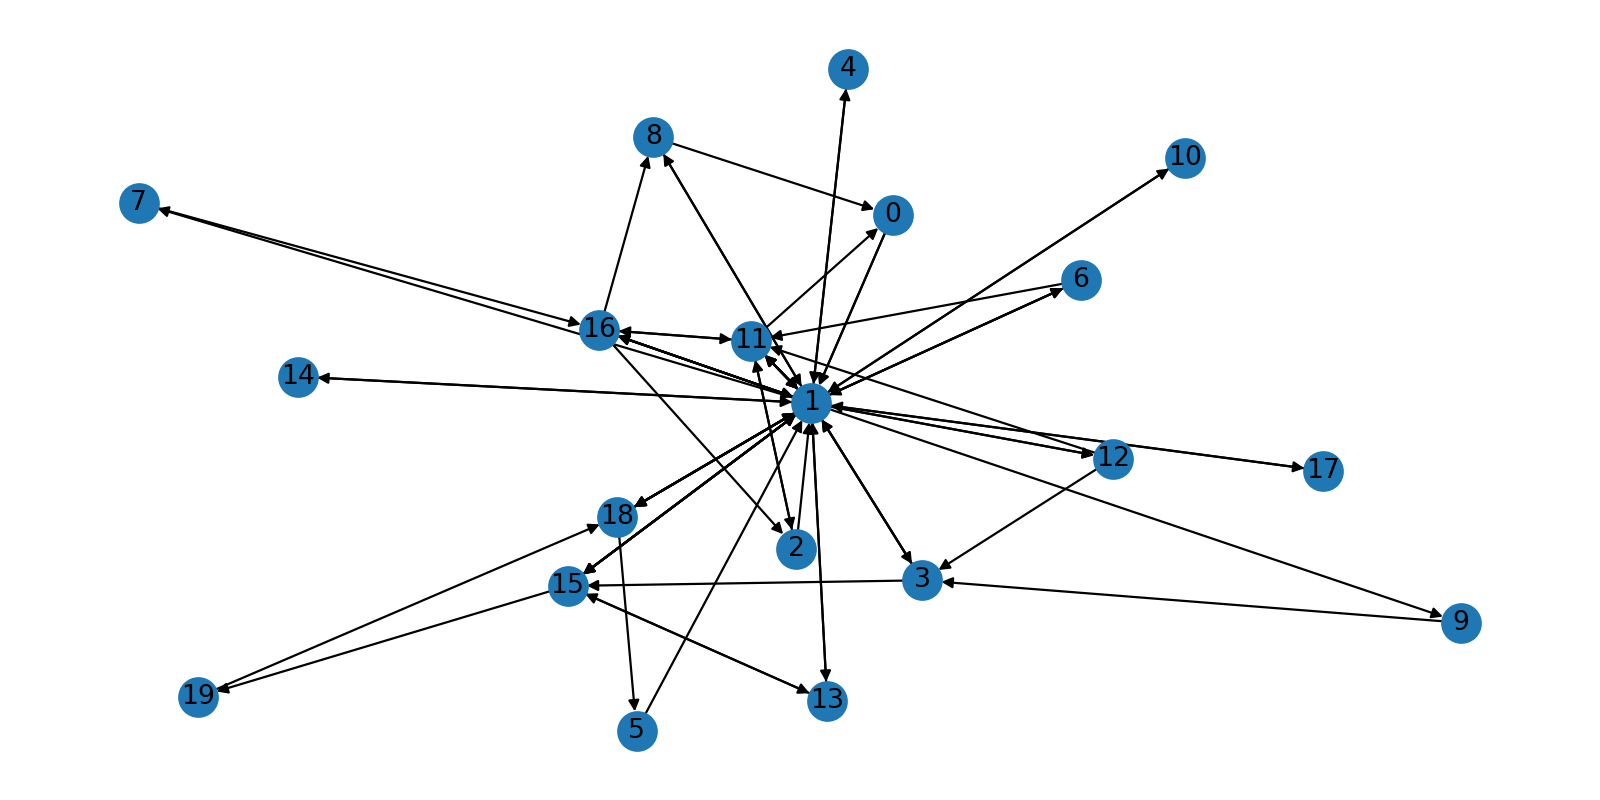

In [8]:
plt.figure(figsize=(10, 5))
nx.draw(G, with_labels=True)
plt.show()

0.0
0.22532836710755888
0.06167686204748202
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.22480724947778208
0.0
0.0
0.0
0.0
0.0
0.0
0.00010424525783736538
0.00010424525783736538
0.00010424525783736538
0.00010424525783736538
0.00010424525783736538
0.00010424525783736538
0.06167686204748202


<IPython.core.display.Javascript object>


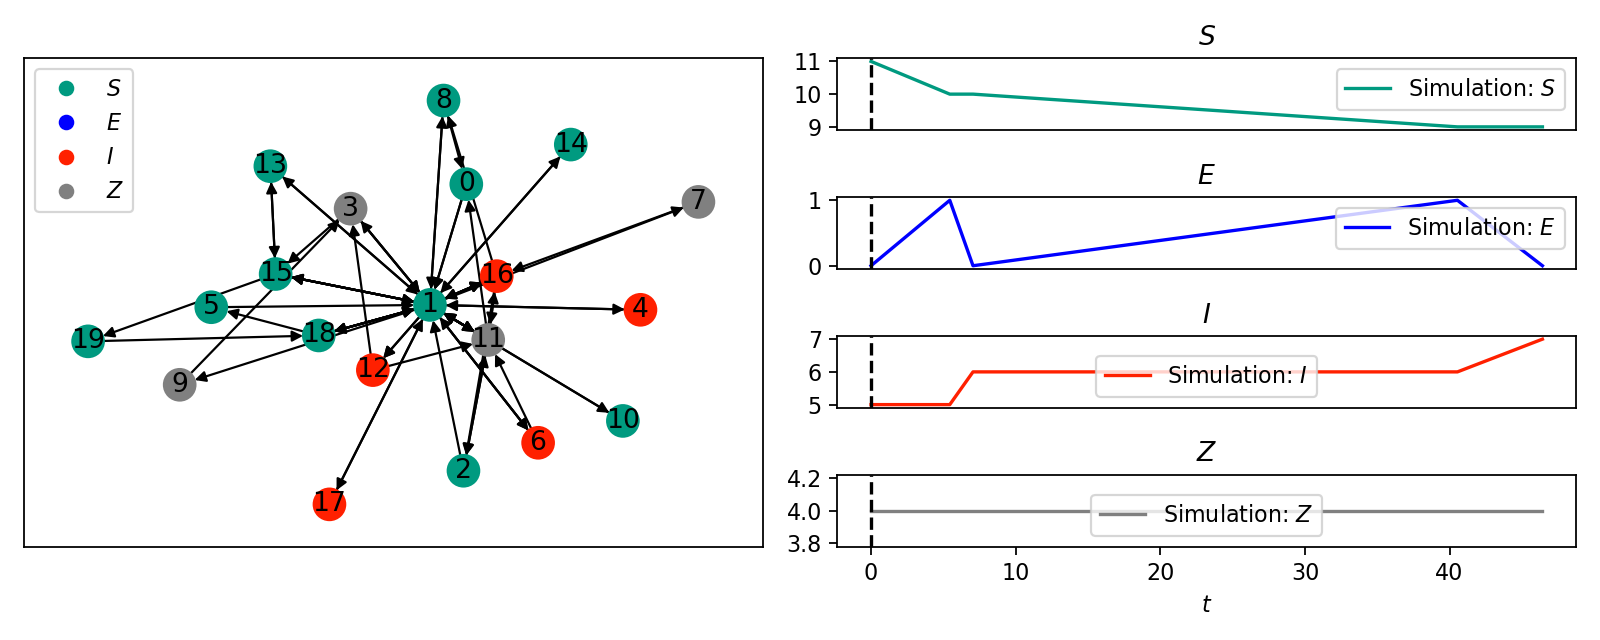

<IPython.core.display.Javascript object>


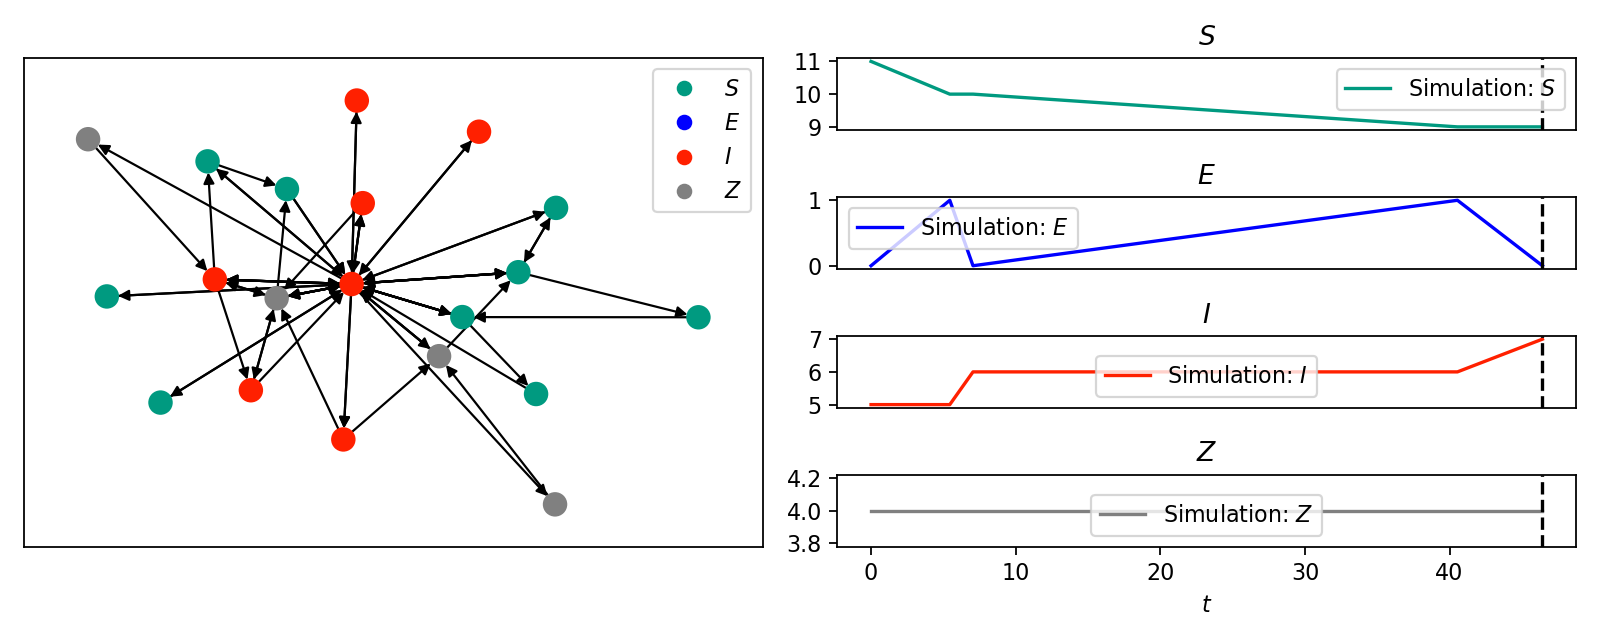

In [55]:
import EoN
import matplotlib.pyplot as plt
from collections import defaultdict #makes defining the initial condition easier
import random
from networkx.drawing.nx_pydot import graphviz_layout


def rate_function(G, node, status, parameters):
    # This function needs to return the rate at which node changes status.
    
    beta, b, ro, p, e, l = parameters
    if status[node] == 'E':
        infected_neighbours = len([nbr for nbr in G.neighbors(node) if status[nbr] == 'I'])
        rate_of_infection = 1 - (1 - ro)**infected_neighbours
        
        return e + rate_of_infection
    
    elif status[node] == 'S':
        infected_neighbours = len([nbr for nbr in G.neighbors(node) if status[nbr] == 'I'])
        rate_of_infection = 1 - (1 - beta)**infected_neighbours
        
        skeptical_neighbours = len([nbr for nbr in G.neighbors(node) if status[nbr] == 'Z'])
        rate_of_skeptisim = 1 - (1 - b)**skeptical_neighbours
        print(rate_of_skeptisim + rate_of_infection)
        return rate_of_skeptisim + rate_of_infection
    else:
        return 0

def transition_choice(G, node, status, parameters):
    #this function needs to return the new status of node.  We already
    #know it is changing status.
    #
    #this function could be more elaborate if there were different
    #possible transitions that could happen.
    
    beta, b, ro, p, e, l = parameters
        
    if status[node] == 'E':
        return 'I'
    elif status[node] == 'S':
        infected_neighbours = len([nbr for nbr in G.neighbors(node) if status[nbr] == 'I'])
        rate_of_infection = 1 - (1 - beta)**infected_neighbours
        
        skeptical_neighbours = len([nbr for nbr in G.neighbors(node) if status[nbr] == 'Z'])
        rate_of_skeptisim = 1 - (1 - b)**skeptical_neighbours
        
        print(rate_of_skeptisim)
        probI = rate_of_infection
        probZ = rate_of_skeptisim
        
        if (probI == 0):
            return np.random.choice(['E', 'Z'], p=[1 - l, l])
        elif (probZ == 0):
            return np.random.choice(['I', 'E'], p=[p, 1 - p])

        scaler = (1 / probI) / (1 / probZ)

        probX = 1 / (1 + scaler)

        probY = probX * scaler
        
        
        if np.random.choice(['I', 'Z'], p=[probX, probY]) == 'I':
            return np.random.choice(['I', 'E'], p=[p, 1 - p])
        else:
            return np.random.choice(['E', 'Z'], p=[1 - l, l])

def get_influence_set(G, node, status, parameters):
    #this function needs to return any node whose rates might change
    #because ``node`` has just changed status.
    #
    #the only neighbors a node might affect are the susceptible ones.

#     return {nbr for nbr in G.neighbors(node) if status[nbr] == 'S'}
    return G.neighbors(node)

beta = 0.00010424525783735672
b = 0.061676862047482
ro = 0.17296291342110615
p = 0.032964728489218095
e = 0.02965275728725226
l = 0.024327454154160776

parameters = (beta, b, ro, p, e, l)

IC = defaultdict(lambda: 'S')
for node in random.choices(list(range(20)), k=10):
    IC[node] = np.random.choice(['I', 'Z'], p=[0.5, 0.5])
    
color_dict = {'S': '#009a80','E': 'blue', 'I':'#ff2000', 'Z':'gray'}
pos = {node:node for node in G}
tex = True
sim_kwargs = {'color_dict':color_dict, 'tex':tex}

sim = EoN.Gillespie_complex_contagion(G, rate_function,
                           transition_choice, get_influence_set, IC,
                           return_statuses=('S', 'E', 'I', 'Z'),
                           parameters=parameters, return_full_data=True, sim_kwargs=sim_kwargs)

times, D = sim.summary()

sim.display(0, node_size = 200, ts_plots=['S', 'E', 'I', 'Z'], nodelist = [], with_labels=True)
# plt.savefig('SIRV_display.png')

from matplotlib import animation

# https://github.com/kkroening/ffmpeg-python/issues/251#issuecomment-520944849
writergif = animation.FFMpegWriter(fps=5)

ani=sim.animate(ts_plots=['S', 'E', 'I', 'Z'], node_size = 100)
ani.save('SIRV_animate.mp4', writer=writergif)

# plt.figure(figsize=(10, 5))
# plt.plot(t, I)

# plt.show()

<IPython.core.display.Javascript object>


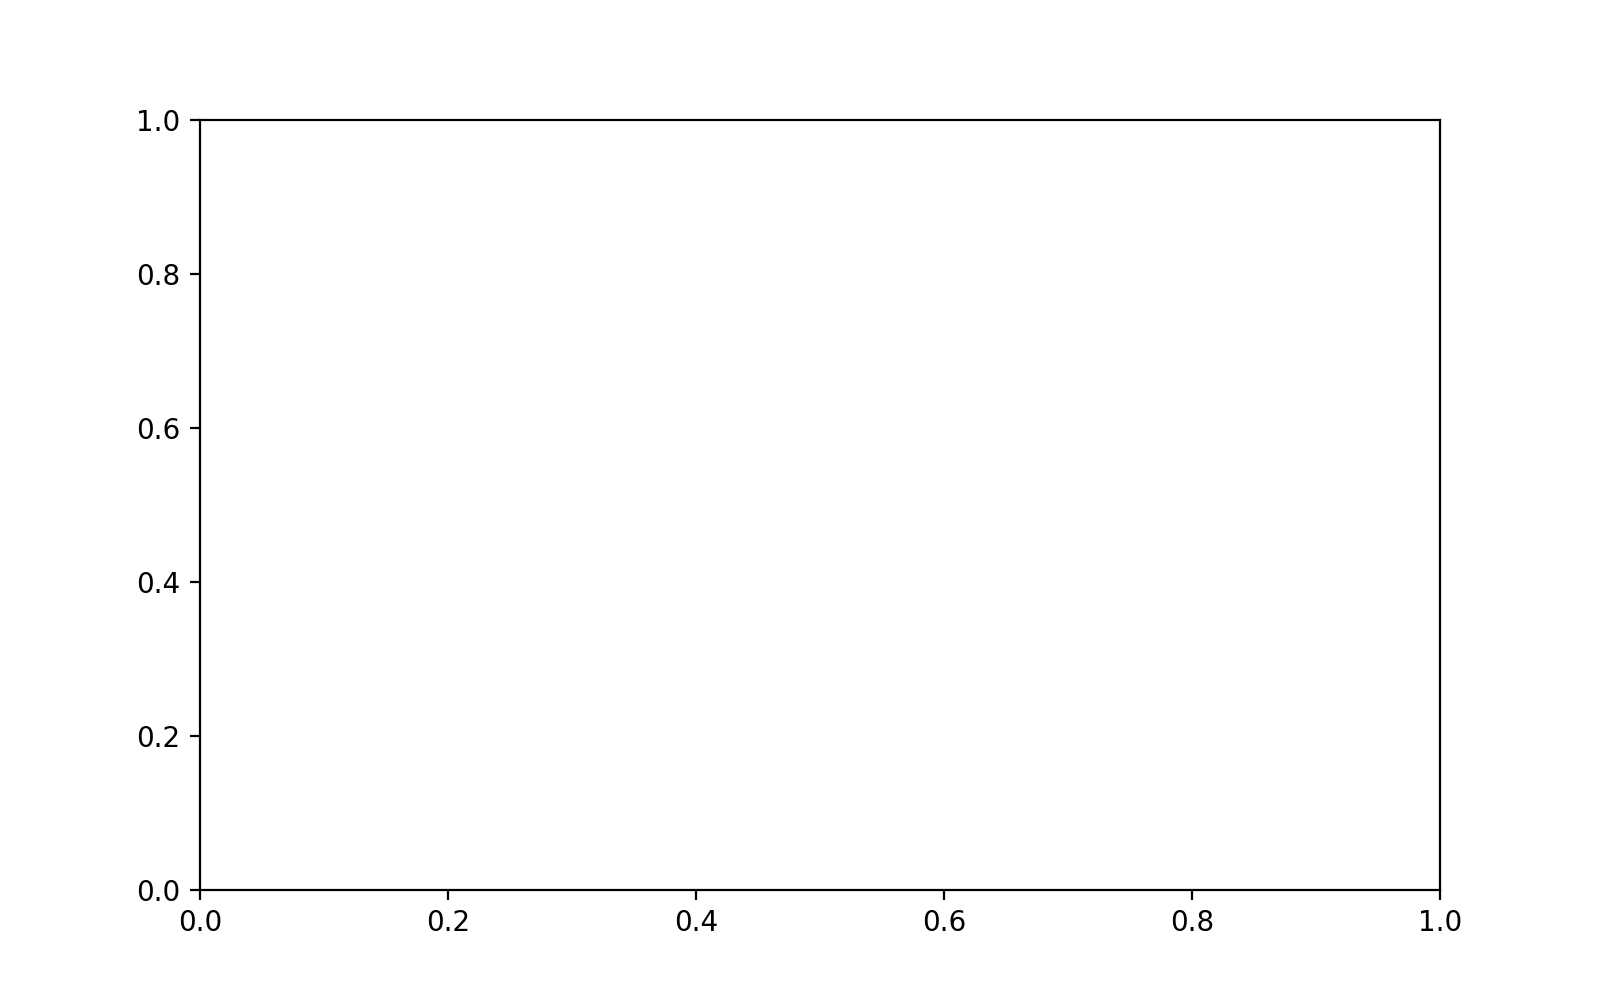

ImportError: requires pygraphviz http://pygraphviz.github.io/

In [139]:
# nx.draw_networkx_edges(G, pos=nx.spring_layout(G))

plt.figure(figsize=(8,5))
ax = plt.gca()
nx.draw_networkx_edges(G, pos=nx.nx_agraph.graphviz_layout(G), arrows=True, arrowstyle='->', 
                       edge_color='green', width=2, ax=ax)
nx.draw_networkx_nodes(G, pos=nx.nx_agraph.graphviz_layout(G), node_color='orange')
nx.draw_networkx_labels(G, pos=nx.nx_agraph.graphviz_layout(G))
plt.box(False)

In [160]:
G[0][19][0].status

AttributeError: 'dict' object has no attribute 'status'

In [178]:
IC

defaultdict(<function __main__.<lambda>()>,
            {18: 'I',
             13: 'I',
             12: 'I',
             0: 'S',
             1: 'S',
             2: 'S',
             3: 'S',
             4: 'S',
             5: 'S',
             6: 'S',
             7: 'S',
             8: 'S',
             9: 'S',
             10: 'S',
             11: 'S',
             14: 'S',
             15: 'S',
             16: 'S',
             17: 'S',
             19: 'S'})

In [176]:
list(range(10))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [196]:
nx.draw(G)

In [190]:
D

{'S': array([17, 16, 16, 16, 16, 16, 15, 15, 14, 14, 13, 13]),
 'I': array([3, 4, 3, 2, 1, 0, 1, 0, 1, 0, 1, 0]),
 'R': array([0, 0, 1, 2, 3, 4, 4, 5, 5, 6, 6, 7])}

In [29]:
np.random.choice(['I', 'Z'], p=[0.1, 0.9])

'Z'

In [40]:
probI = 0.00010424525783735672
probZ = 0.061676862047482

scaler = (1 / probI) / (1 / probZ)

probX = 1 / (1 + scaler)

probY = probX * scaler

print(probX, probY)

0.0016873322992121441 0.998312667700788


In [52]:
# for node in random.choices(list(range(20)), k=3):
#     IC[node] = 'I'
IC

while 

defaultdict(<function __main__.<lambda>()>,
            {14: 'Z',
             8: 'Z',
             0: 'S',
             1: 'S',
             2: 'S',
             3: 'S',
             4: 'S',
             5: 'S',
             6: 'S',
             7: 'S',
             9: 'S',
             10: 'S',
             11: 'S',
             12: 'S',
             13: 'S',
             15: 'S',
             16: 'S',
             17: 'S',
             18: 'S',
             19: 'S'})